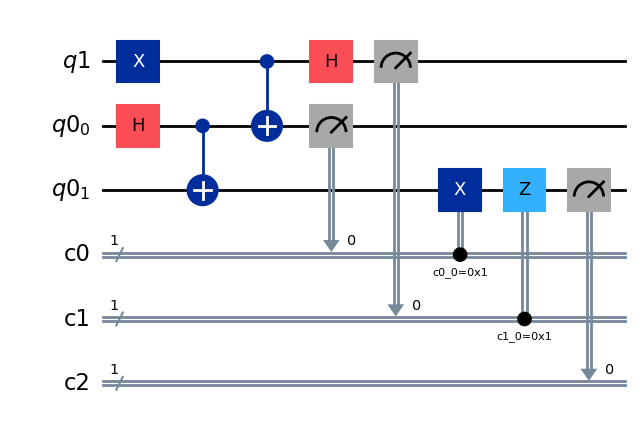

In [1]:
import qiskit

creg1 = qiskit.ClassicalRegister(1)
creg2 = qiskit.ClassicalRegister(1)
creg3 = qiskit.ClassicalRegister(1)
qubit_pair = qiskit.QuantumRegister(2)
outside_qubit = qiskit.QuantumRegister(1)
circuit = qiskit.QuantumCircuit(outside_qubit,qubit_pair,creg1,creg2,creg3)

circuit.x(outside_qubit[0])
circuit.h(qubit_pair[0])
circuit.cx(qubit_pair[0],qubit_pair[1])
circuit.cx(outside_qubit[0],qubit_pair[0])
circuit.h(outside_qubit[0])
circuit.measure(qubit_pair[0],creg1[0])
circuit.measure(outside_qubit[0],creg2[0])
circuit.x(qubit_pair[1]).c_if(creg1[0],1)
circuit.z(qubit_pair[1]).c_if(creg2[0],1)
circuit.measure(qubit_pair[1],creg3[0])


circuit.draw('mpl')

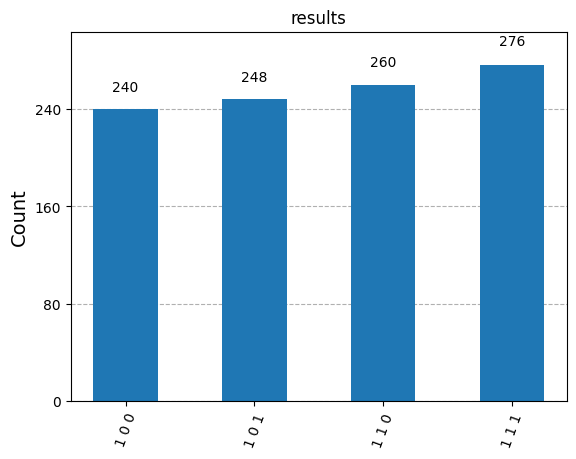

In [2]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
simulator = AerSimulator()
circ = transpile(circuit, simulator)
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='results')